In [1]:
import numpy as np
import pandas as pd
#import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

In [2]:
#sns.set(color_codes=True)
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

In [3]:
df = pd.read_csv('C:/Users/fakhr/Desktop/Covid19-Sudan/cleaning/Covid19-Khartoum_data_v2.csv', encoding ='cp1256')# ISO-8859–1 windows-1256

In [4]:
df1 = df.drop('index',axis='columns')
df1.head()

,Age,location,Smok_state,Bloodpressure,Heart,Diabetes,ChestDisease,In_contanct_with_confirmed_COVID,Symptoms_state,DryCough,...,ShortOfBreath,Headache,ChestPain,GastrointestinalDisorders,Symptoms_period,Tested,Confirmed_State,Your_conatced_had_symptoms,Commitment_measures,Close_family_deaths
0,3,21,0.0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,5.0,0
1,3,34,0.0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0
2,4,??,0.0,0,0,0,0,2,2,0,...,0,1,0,0,1.0,0.0,0.0,0.0,5.0,0
3,5,ح 75,0.0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,4.0,0
4,5,ابو سعد,0.0,0,0,0,1,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,4.0,0


In [5]:
df1.location = df1.location.apply(lambda x: x.strip())
location_stats = df1['location'].value_counts(ascending=False)
#location_stats

In [6]:
location_stats_less_than_4 = location_stats[location_stats<4]
#location_stats_less_than_4

In [7]:
df1.location = df1.location.apply(lambda x: 'other' if x in location_stats_less_than_4 else x)
len(df.location.unique())

373

In [8]:
df1.head()

,Age,location,Smok_state,Bloodpressure,Heart,Diabetes,ChestDisease,In_contanct_with_confirmed_COVID,Symptoms_state,DryCough,...,ShortOfBreath,Headache,ChestPain,GastrointestinalDisorders,Symptoms_period,Tested,Confirmed_State,Your_conatced_had_symptoms,Commitment_measures,Close_family_deaths
0,3,other,0.0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,5.0,0
1,3,other,0.0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0
2,4,other,0.0,0,0,0,0,2,2,0,...,0,1,0,0,1.0,0.0,0.0,0.0,5.0,0
3,5,other,0.0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,4.0,0
4,5,ابو سعد,0.0,0,0,0,1,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,4.0,0


In [9]:
#df1 = df1.drop(['DryCough', 'Fever', 'Anosmia', 'Fatigue', 'ShortOfBreath', 'Headache',
#       'ChestPain', 'GastrointestinalDisorders'],axis='columns')
#df1 = df1.drop(['Bloodpressure', 'Heart', 'Diabetes', 'ChestDisease'],axis='columns')
#df1.shape

<h2 style='color:blue'>1- Encodeing our Data</h2>

# Dealing with missing data 

In [10]:
df1.Tested.fillna(value=0, inplace=True)                                  #Take the variable and in every 'nan' consider not tested
#df1.Confirmed_State.fillna(value=-1, inplace=True)               #Consider not confirmed in missing place
df1.Your_conatced_had_symptoms.fillna(value=0, inplace=True)   #If missing put zero 
df1.Commitment_measures.fillna(value=1, inplace=True)      #Replacce missing with 2 by defult
df1.Symptoms_period.fillna(value=0, inplace=True)
df1.Smok_state.fillna(value=0, inplace=True)
df1.Close_family_deaths.fillna(value=0, inplace=True)


In [11]:
df2 = df1.apply(lambda x: pd.factorize(x, sort=True)[0])
#encode = df1.apply(lambda x: pd.factorize(x, sort=True)[0])

In [12]:
#encode.location.value_counts()[:50]


In [13]:
 # df1.location.value_counts()[:50]

In [14]:
df2.shape

(5132, 23)

In [15]:
df1.location.unique()

array(['other', 'ابو سعد', 'ابو ادم', 'ابوروف', 'اركوبت', 'اركويت',
       'الازهرى', 'الازيرقاب', 'الاسكان', 'الامتداد', 'الاملاك',
       'الاندلس', 'البراري', 'البستان', 'البوسته', 'التلال', 'الثورة',
       'الجرافة', 'الجريف شرق', 'الجريف غرب', 'الجميعاب', 'الجيلي',
       'الحاج يوسف', 'الحتانة', 'الحلة الجديدة', 'الحلفاية',
       'الحله الجدبده', 'الختمية', 'الخرطوم', 'الخوجلاب', 'الدروشاب',
       'الدناقلة', 'الدوحة', 'الدوحه', 'الديم', 'الراقي', 'الركابية',
       'الرميلة', 'الروضة', 'الرياض', 'السامراب', 'السجانة', 'السلمة',
       'الشجرة', 'الشعبية', 'الشقلة', 'الشقيلاب', 'الشهداء', 'جبرة',
       'الصافية', 'الصالحة', 'الصبابي', 'الصحافة', 'الصفا', 'الطايف',
       'العباسية', 'العرضة', 'العرضه', 'العزبة', 'العزوزاب', 'العشرة',
       'العمارات', 'العيلفون', 'الفتيحاب', 'الفردوس', 'الفيحاء',
       'القادسية', 'القادسيه', 'القلعة', 'القماير', 'القوز', 'الكدرو',
       'الكلاكلة', 'اللاماب', 'اللاماب ناصر', 'المايقوما', 'المجاهدين',
       'المربعات', 'المزاد', 'المسالمة

In [16]:
df2.location.unique()

array([  0,   2,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47, 101,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 103, 102,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 113, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139], dtype=int64)

<h2 style='color:blue'> 2 - Split the data to three dataset</h2>

In [17]:
# first part (poeple don't have symptoms)
datasettemp1 = df2[df2["Symptoms_state"]==0]
dataset1 =  datasettemp1.drop(["Symptoms_state","Tested","Confirmed_State"],axis='columns')
dataset1.shape

(3217, 20)

In [18]:
df3 = df2[df2["Symptoms_state"]!=0]
df3.shape

(1915, 23)

In [19]:
# second part (poeple have symptoms but not tested)
datasettemp2 = df3[df3["Tested"]!=1]
dataset2 =  datasettemp2.drop(["Symptoms_state","Tested","Confirmed_State"],axis='columns')
dataset2.shape

(1779, 20)

In [20]:
# second part (poeple have symptoms and not tested)
datasettemp3 = df3[df3["Tested"]==1]
dataset3 =  datasettemp3.drop(["Symptoms_state","Tested"],axis='columns')
dataset3.shape

(136, 21)

In [21]:
dataset3 = dataset3[dataset3["Confirmed_State"]!=-1]
dataset3["Confirmed_State"].value_counts()

0    69
1    57
Name: Confirmed_State, dtype: int64

In [22]:
Y = dataset3["Confirmed_State"]
dataset3 = dataset3.drop("Confirmed_State",axis='columns')
dataset3.shape

(126, 20)

In [23]:
#copy of our dataset
data1= dataset1.copy()
data2= dataset2.copy()
data3= dataset3.copy()

<h2 style='color:blue'>Prepare for creating a model</h2>

In [24]:
dataset2.columns

Index(['Age', 'location', 'Smok_state', 'Bloodpressure', 'Heart', 'Diabetes',
       'ChestDisease', 'In_contanct_with_confirmed_COVID', 'DryCough', 'Fever',
       'Anosmia', 'Fatigue', 'ShortOfBreath', 'Headache', 'ChestPain',
       'GastrointestinalDisorders', 'Symptoms_period',
       'Your_conatced_had_symptoms', 'Commitment_measures',
       'Close_family_deaths'],
      dtype='object')

In [25]:
cols = ['Age', 'location', 'Bloodpressure', 'Heart', 'Diabetes',
       'ChestDisease', 'In_contanct_with_confirmed_COVID', 'DryCough', 'Fever',
       'Anosmia', 'Fatigue', 'ShortOfBreath', 'Headache', 'ChestPain',
       'GastrointestinalDisorders', 'Symptoms_period',
       'Your_conatced_had_symptoms', 'Commitment_measures',
       'Close_family_deaths']

In [26]:
dataset1 = dataset1[cols]
dataset2 = dataset2[cols]
dataset3 = dataset3[cols]
dataset3.shape

(126, 19)

In [27]:
dataset2.shape

(1779, 19)

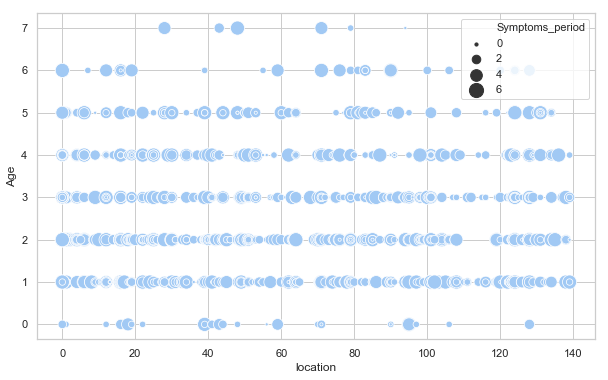

In [28]:
# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="location", y="Age",
                     hue=None, size="Symptoms_period",
                     palette=cmap, sizes=(10, 200),
                     data=data2)

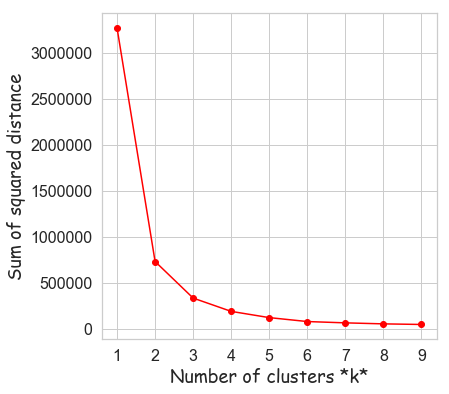

In [29]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km1 = KMeans(n_clusters=k)
    km1.fit(dataset2)
    sse.append(km1.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o',color='red' )
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(r'Number of clusters *k*',fontname='Comic Sans MS', fontsize=18)
plt.ylabel('Sum of squared distance',fontname='Comic Sans MS', fontsize=18);

In [30]:

n_iter = 20
K_mode_accu = []
random_st = []
centers = []
datx = dataset2.iloc[:].values
for i in range(n_iter):
    
    rn = int(np.random.randint(0, 1000, size=1))
    km1 = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1, random_state=rn)
    km1.fit(datx)
    pp = km1.predict(dataset3)
    #print ("K-mode accuracy: ",accuracy_score(pp, Y)," random_state=", rn) 
    K_mode_accu.append(accuracy_score(pp, Y))
    random_st.append(rn)
    centroids = km1.cluster_centroids_
    centers.append(centroids)
print("K-mode accuracy and random state")  
for s in range(0,n_iter):
    print(K_mode_accu[s],"  ",random_st[s])


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 342, cost: 10508.0
Run 1, iteration: 2/100, moves: 64, cost: 10508.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 296, cost: 10560.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 515, cost: 10363.0
Run 3, iteration: 2/100, moves: 189, cost: 10290.0
Run 3, iteration: 3/100, moves: 1, cost: 10290.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 374, cost: 10785.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 282, cost: 10240.0
Run 5, iteration: 2/100, moves: 120, cost: 10240.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 468, cost:

# K-means

In [31]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=2, max_iter=300, random_state=None, algorithm='elkan')
clusters = kmeans.fit(dataset2)
kmeans.cluster_centers_[:,0]

array([2.47720042, 2.38397129])

In [32]:
# Sum of squared distances of samples to their closest cluster center.
kmeans.inertia_

730433.0713733018

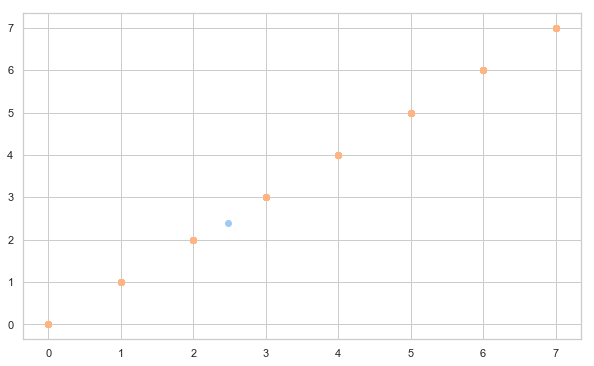

In [33]:
alldistances = kmeans.transform(dataset2)

#plt.scatter(alldistances[:,0],alldistances[:,1])
plt.scatter(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[1,0])
plt.scatter(dataset2["Age"],dataset2["Age"])

In [34]:
#https://www.youtube.com/watch?v=X3Q6JFl8vjA
#cols = data.columns[2:]
#data["cluster"] = kmean.fit_predict(data[data.columns[1:]])
#pca = PCA (n_components=2)
#dataset2["x"] = pca.fit.transform(dataset2[dataset2.columns[2:]])[:,0]
#data["x"] = pca.fit.tranform(data[cols])[:,1]
#data = data.reset_index()
#dataset2.head()

# K-mode

In [35]:
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1, random_state= 49)
clusters_M = km.fit(dataset2)
# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 433, cost: 10540.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 496, cost: 10381.0
Run 2, iteration: 2/100, moves: 287, cost: 10302.0
Run 2, iteration: 3/100, moves: 45, cost: 10302.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 334, cost: 10335.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 275, cost: 10159.0
Run 4, iteration: 2/100, moves: 1, cost: 10159.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 382, cost: 10283.0
Run 5, iteration: 2/100, moves: 76, cost: 10283.0
Best run was number 4
[[ 2 16  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  4  0]
 [ 1 16  0  0  0  0  0  0  1  1  1  0  1  0  1  2  1  3  0]]


# Export k-mode Model

In [36]:
import pickle
pickle.dump(km, open('kmodemodel.pkl','wb'))
#case= [[ 1, 16, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 3, 0]]
#print(int(km.predict(case)))
#print(km.predict([[ 1 16  0  0  0  0  0  0  1  1  1  0  1  0  1  2  1  3  0]]))

In [37]:
#kmodemodel = pickle.load(open('kmodemodel.pkl','rb'))
#case= [[ 1, 16, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 3, 0]]
#print(int(kmodemodel.predict(case)))
dataset2.columns

Index(['Age', 'location', 'Bloodpressure', 'Heart', 'Diabetes', 'ChestDisease',
       'In_contanct_with_confirmed_COVID', 'DryCough', 'Fever', 'Anosmia',
       'Fatigue', 'ShortOfBreath', 'Headache', 'ChestPain',
       'GastrointestinalDisorders', 'Symptoms_period',
       'Your_conatced_had_symptoms', 'Commitment_measures',
       'Close_family_deaths'],
      dtype='object')

In [38]:
print('Final training cost: {}'.format(km.cost_))
print('Training iterations: {}'.format(km.max_iter))


Final training cost: 10159.0
Training iterations: 100


In [39]:
clusters_M.labels_

array([0, 1, 0, ..., 1, 0, 0], dtype=uint16)

In [40]:
pred_d3_M = clusters_M.predict(dataset3)
pred_d2_M = clusters_M.predict(dataset2)
pred_d1_M = clusters_M.predict(dataset1)
pred_d3 = clusters.predict(dataset3)
pred_d2 = clusters.predict(dataset2)
pred_d1 = clusters.predict(dataset1)
data1["pre_M"] = pred_d1_M
data2["pre_M"] = pred_d2_M
data2["pre_K"] = pred_d2
data3["pre_M"] = pred_d3_M

In [41]:
# Load the example planets dataset
planets = sns.load_dataset("planets")

#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
#ax = sns.scatterplot(x="plot_columns0", y="plot_columns1",
#                    hue=None, size=None,
#                     palette="pre_M", sizes=(10, 200),
#                     data=data2)

In [42]:
clusters.score(dataset2)

-730433.0713733016

In [43]:

print ("K-means: ",accuracy_score(pred_d3, Y),"K-mode: ",accuracy_score(pred_d3_M, Y))

K-means:  0.5158730158730159 K-mode:  0.7063492063492064


In [44]:
#print(classification_report(Y,pred_d3_M))

In [45]:
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
#d1 = tsne.fit_transform(data1)
d2 = tsne.fit_transform(dataset2)
d3 = tsne.fit_transform(dataset3)

# Compute the clusters
clust_M = km.fit(d2)
pre_M_d3 = clust_M.predict(d3)
pre_M_d2 = clust_M.predict(d2)
clust = kmeans.fit(d2)
pre_d3 = clust.predict(d3)
pre_d2 = clust.predict(d2)
data2["pre_TM"] = pre_M_d2
data2["pre_TK"] = pre_d2
#pre_d1 = clust.predict(d1) 
print ("K-means: ",accuracy_score(pre_d3, Y),"K-mode: ",accuracy_score(pre_M_d3, Y))


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3552.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 3552.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 3552.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 3552.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 3552.0
Best run was number 1
K-means:  0.47619047619047616 K-mode:  0.5476190476190477


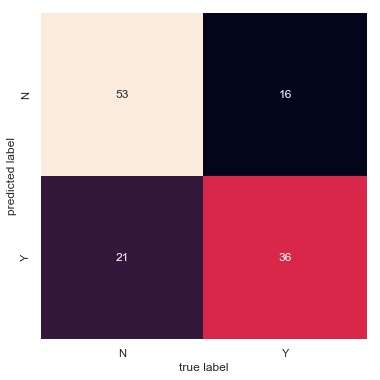

In [46]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(pred_d3_M, Y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels="NY",
            yticklabels="NY")
plt.xlabel('true label')
plt.ylabel('predicted label');

In [47]:
print ("Total data1 :", len(pred_d1))
print ("not infected:",len(pred_d1)- np.count_nonzero(pred_d1))
print ("Infected : ",np.count_nonzero(pred_d1))
print ("----------------------------------------------------------")
print ("Total data2 : ", len(pred_d2))
print ("not infected:",len(pred_d2)- np.count_nonzero(pred_d2))
print ("Infected : ",np.count_nonzero(pred_d2))
print ("----------------------------------------------------------")

print ("Total data3 : ", len(pred_d3))
print ("not infectede:",len(pred_d3)- np.count_nonzero(pred_d3))
print ("Infected: ",np.count_nonzero(pred_d3))
print ("----------------------------------------------------------")
print ("Total actual data ", len(Y))
print ("not infected:",len(Y)- np.count_nonzero(Y))
print ("Infected: ",np.count_nonzero(Y))
print ("----------------------------------------------------------")
print ("Total data :", len(pred_d1)+len(pred_d2))
print ("not infected:", len(pred_d1) + len(pred_d2) - np.count_nonzero(pred_d1) - np.count_nonzero(pred_d2))
print ("Infected: ",np.count_nonzero(pred_d1) + np.count_nonzero(pred_d2))
print ((np.count_nonzero(pred_d1) + np.count_nonzero(pred_d2))/(len(pred_d1)+len(pred_d2))*100,"%")

Total data1 : 3217
not infected: 1778
Infected :  1439
----------------------------------------------------------
Total data2 :  1779
not infected: 943
Infected :  836
----------------------------------------------------------
Total data3 :  126
not infectede: 56
Infected:  70
----------------------------------------------------------
Total actual data  126
not infected: 69
Infected:  57
----------------------------------------------------------
Total data : 4996
not infected: 2721
Infected:  2275
45.53642914331465 %


In [48]:
print ("Total data1 :", len(pred_d1_M))
print ("not infected:",len(pred_d1_M)- np.count_nonzero(pred_d1_M))
print ("Infected : ",np.count_nonzero(pred_d1_M))
print ("----------------------------------------------------------")
print ("Total data2 : ", len(pred_d2_M))
print ("not infected:",len(pred_d2_M)- np.count_nonzero(pred_d2_M))
print ("Infected : ",np.count_nonzero(pred_d2_M))
print ((np.count_nonzero(pred_d2_M))/(len(pred_d2_M))*100,"%")
print ("----------------------------------------------------------")

print ("Total data3 : ", len(pred_d3_M))
print ("not infectede:",len(pred_d3_M)- np.count_nonzero(pred_d3_M))
print ("Infected: ",np.count_nonzero(pred_d3_M))
print ("----------------------------------------------------------")
print ("Total actual data ", len(Y))
print ("not infected:",len(Y)- np.count_nonzero(Y))
print ("Infected: ",np.count_nonzero(Y))
print ("----------------------------------------------------------")
print ("Total data :", len(pred_d1_M)+len(pred_d2_M))
print ("not infected:", len(pred_d1_M) + len(pred_d2_M) - np.count_nonzero(pred_d1_M) - np.count_nonzero(pred_d2_M))
print ("Infected: ",np.count_nonzero(pred_d1_M) + np.count_nonzero(pred_d2_M))
print ((np.count_nonzero(pred_d1_M) + np.count_nonzero(pred_d2_M))/(len(pred_d1_M)+len(pred_d2_M))*100,"%")

Total data1 : 3217
not infected: 3217
Infected :  0
----------------------------------------------------------
Total data2 :  1779
not infected: 1295
Infected :  484
27.206295671725687 %
----------------------------------------------------------
Total data3 :  126
not infectede: 74
Infected:  52
----------------------------------------------------------
Total actual data  126
not infected: 69
Infected:  57
----------------------------------------------------------
Total data : 4996
not infected: 4512
Infected:  484
9.687750200160128 %


<h2 style='color:red'>Some visualizations</h2>

In [49]:
data2.shape

(1779, 24)

In [50]:
data2[data2.pre_M==data2.pre_TK].shape

(975, 24)

In [51]:
print(data2[data2.pre_M==data2.pre_TM].shape[0]/data2.shape[0]*100,"%")

72.73749297358066 %


In [52]:
from mpl_toolkits.mplot3d import Axes3D

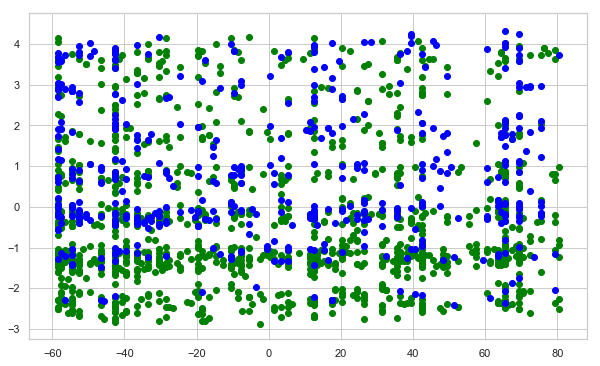

In [53]:
pca_2 = PCA(2)
plot_columns= pca_2.fit_transform(dataset2)
data2["plot_columns0"] = plot_columns[:,0]
data2["plot_columns1"] = plot_columns[:,1]

#plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=pred_d2_M , s=10)
plt.scatter(data2[data2["pre_M"] == 0]["plot_columns0"], data2[data2["pre_M"] == 0]["plot_columns1"], c='green', label='cluster 1')
plt.scatter(data2[data2["pre_M"] == 1]["plot_columns0"], data2[data2["pre_M"] == 1]["plot_columns1"], c='blue', label='cluster 1')


In [54]:
data2.head()

,Age,location,Smok_state,Bloodpressure,Heart,Diabetes,ChestDisease,In_contanct_with_confirmed_COVID,DryCough,Fever,...,Symptoms_period,Your_conatced_had_symptoms,Commitment_measures,Close_family_deaths,pre_M,pre_K,pre_TM,pre_TK,plot_columns0,plot_columns1
2,3,0,0,0,0,0,0,2,0,1,...,1,0,4,0,0,0,0,1,-58.543828,-1.164115
5,2,2,0,0,0,0,1,2,0,1,...,6,1,3,0,1,0,0,1,-56.549233,3.737783
10,3,2,1,0,0,0,0,0,0,0,...,3,0,2,0,0,0,0,1,-56.545611,0.595584
19,2,2,0,0,0,0,0,0,0,0,...,1,0,4,0,0,0,0,1,-56.542875,-1.364681
23,2,2,0,1,0,0,0,2,0,0,...,0,0,4,0,0,0,0,1,-56.542483,-2.384831


Text(0.5, 0.92, 'scatter plot')

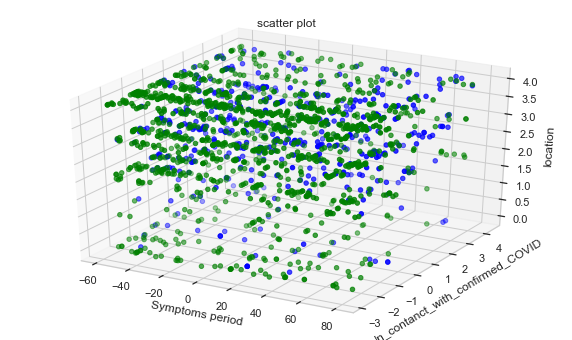

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2[data2.pre_M == 0]["plot_columns0"], data2[data2.pre_M == 0]["plot_columns1"],
           data2[data2.pre_M == 0]["Commitment_measures"],
           c='green', label='cluster 1')
ax.scatter(data2[data2.pre_M == 1]["plot_columns0"], data2[data2.pre_M == 1]["plot_columns1"],
           data2[data2.pre_M == 1]["Commitment_measures"],
           c='blue', label='cluster 2')
ax.set_xlabel('Symptoms period')
ax.set_ylabel('In_contanct_with_confirmed_COVID')
ax.set_zlabel('location')
ax.set_title('scatter plot')

Text(0.5, 0.92, 'scatter plot')

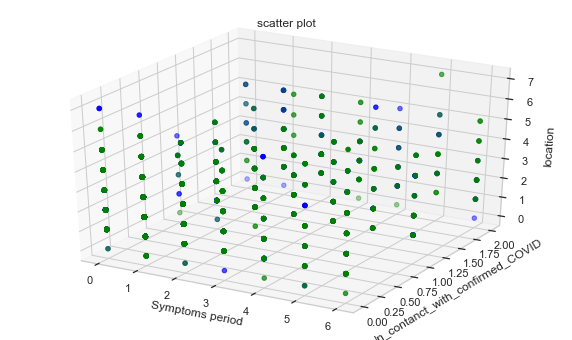

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2[data2.pre_K == 0]["Symptoms_period"], data2[data2.pre_K == 0]["Your_conatced_had_symptoms"],data2[data2.pre_K == 0]["Age"],
            c='green', label='cluster 1')
ax.scatter(data2[data2.pre_K == 1]["Symptoms_period"], data2[data2.pre_K == 1]["Your_conatced_had_symptoms"],data2[data2.pre_K == 1]["Age"],
            c='blue', label='cluster 2')
ax.set_xlabel('Symptoms period')
ax.set_ylabel('In_contanct_with_confirmed_COVID')
ax.set_zlabel('location')
ax.set_title('scatter plot')

Text(0.5, 0.92, 'scatter plot')

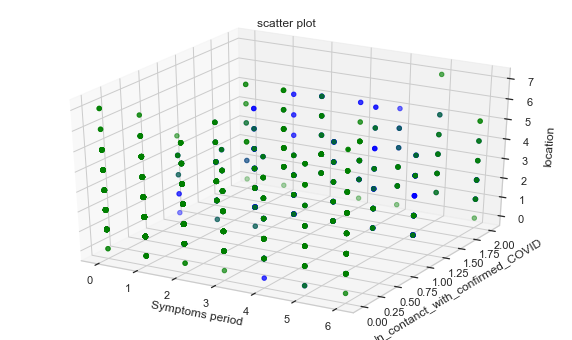

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2[data2.pre_M == 0]["Symptoms_period"], data2[data2.pre_M == 0]["Your_conatced_had_symptoms"],data2[data2.pre_M == 0]["Age"],
            c='green', label='cluster 1')
ax.scatter(data2[data2.pre_M == 1]["Symptoms_period"], data2[data2.pre_M == 1]["Your_conatced_had_symptoms"],data2[data2.pre_M == 1]["Age"],
            c='blue', label='cluster 2')
ax.set_xlabel('Symptoms period')
ax.set_ylabel('In_contanct_with_confirmed_COVID')
ax.set_zlabel('location')
ax.set_title('scatter plot')

Text(0, 0.5, 'Location')

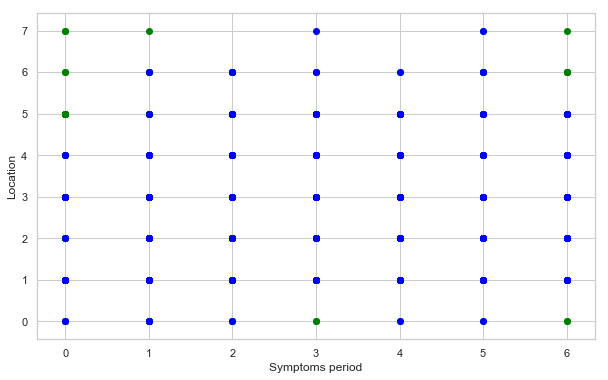

In [58]:
plt.scatter(data2[data2.pre_M == 0]["Symptoms_period"], data2[data2.pre_M == 0]["Age"],
            c='green', label='cluster 1')
plt.scatter(data2[data2.pre_M == 1]["Symptoms_period"], data2[data2.pre_M == 1]["Age"],
            c='blue', label='cluster 2')
plt.xlabel("Symptoms period")
plt.ylabel("Location")


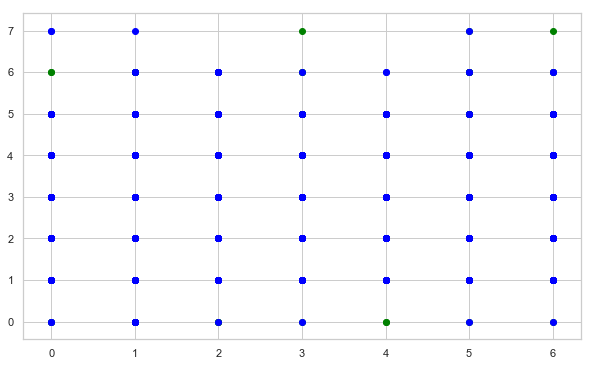

In [59]:
plt.scatter(data2[data2.pre_K == 0].iloc[:,16], data2[data2.pre_K == 0].iloc[:,0],
            c='green', label='cluster 1')
plt.scatter(data2[data2.pre_K == 1].iloc[:,16], data2[data2.pre_K == 1].iloc[:,0],
            c='blue', label='cluster 2')
#plt.scatter(kmeans.cluster_centers_[:, 15], kmeans.cluster_centers_[:, 0], marker='*', s=300, c='r', label='centroid')

In [60]:
Symt_infected_0 = []
Symt_infected_1 = []
Symt_notinfected_0 = []
Symt_notinfected_1 = []
Symt_name = []
cr_d = []
cr_d_name = []
for i in range(3,7):
    cr_d.append(data2[data2.pre_M == 1].iloc[:,i].value_counts()[1])
    cr_d_name.append(data2[data2.pre_M == 0].iloc[:,i].name)
for i in range(8,16):
    pp_0 = data2[data2.pre_M == 0].iloc[:,i]
    pp_1 = data2[data2.pre_M == 1].iloc[:,i]
    Symt_notinfected_0.append(pp_0.value_counts()[0])
    Symt_notinfected_1 .append(pp_0.value_counts()[1])
    Symt_infected_0.append(pp_1.value_counts()[0])
    Symt_infected_1.append(pp_1.value_counts()[1])
    Symt_name.append(pp_1.name)
print("Cases have symptoms and predicted as infected ")
for k in range(0,8):
    print(Symt_name[k]," = ",np.round(Symt_infected_1[k]/len(pp_1)*100,2), " %")    
print("Cases have symptoms and predicted as not infected ")
for k in range(0,8):
    print(Symt_name[k]," = ",np.round(Symt_infected_0[k]/len(pp_0)*100,2), " %" )    

Cases have symptoms and predicted as infected 
DryCough  =  36.36  %
Fever  =  72.93  %
Anosmia  =  62.81  %
Fatigue  =  83.88  %
ShortOfBreath  =  21.49  %
Headache  =  82.64  %
ChestPain  =  29.55  %
GastrointestinalDisorders  =  58.47  %
Cases have symptoms and predicted as not infected 
DryCough  =  23.78  %
Fever  =  10.12  %
Anosmia  =  13.9  %
Fatigue  =  6.02  %
ShortOfBreath  =  29.34  %
Headache  =  6.49  %
ChestPain  =  26.33  %
GastrointestinalDisorders  =  15.52  %


In [61]:
data2.head()

,Age,location,Smok_state,Bloodpressure,Heart,Diabetes,ChestDisease,In_contanct_with_confirmed_COVID,DryCough,Fever,...,Symptoms_period,Your_conatced_had_symptoms,Commitment_measures,Close_family_deaths,pre_M,pre_K,pre_TM,pre_TK,plot_columns0,plot_columns1
2,3,0,0,0,0,0,0,2,0,1,...,1,0,4,0,0,0,0,1,-58.543828,-1.164115
5,2,2,0,0,0,0,1,2,0,1,...,6,1,3,0,1,0,0,1,-56.549233,3.737783
10,3,2,1,0,0,0,0,0,0,0,...,3,0,2,0,0,0,0,1,-56.545611,0.595584
19,2,2,0,0,0,0,0,0,0,0,...,1,0,4,0,0,0,0,1,-56.542875,-1.364681
23,2,2,0,1,0,0,0,2,0,0,...,0,0,4,0,0,0,0,1,-56.542483,-2.384831


In [62]:
data2[data2.pre_M == 1]["ChestDisease"].value_counts()
#["Bloodpressure","Heart","Diabetes","ChestDisease"]

0    436
1     48
Name: ChestDisease, dtype: int64

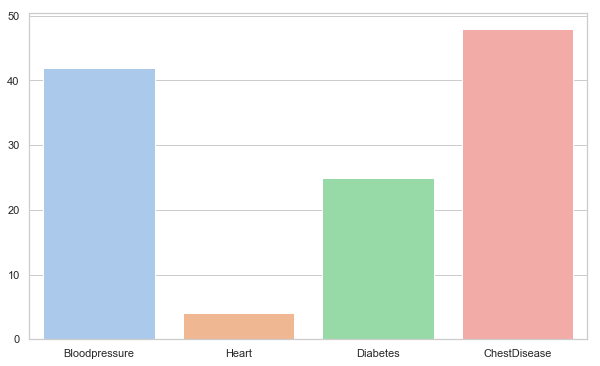

In [63]:
sns.barplot(cr_d_name,cr_d, )

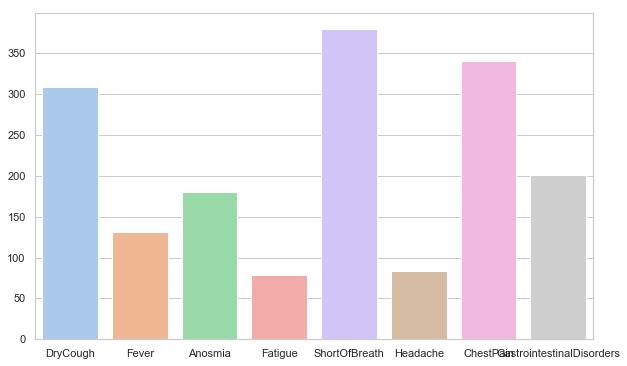

In [64]:
# Frequency of infected cases don't have these symptoms
sns.barplot(Symt_name,Symt_infected_0)

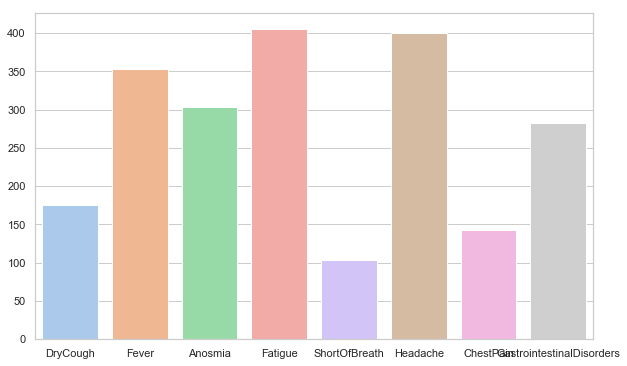

In [65]:
# Frequency of infected cases do have these symptoms
sns.barplot(Symt_name,Symt_infected_1)

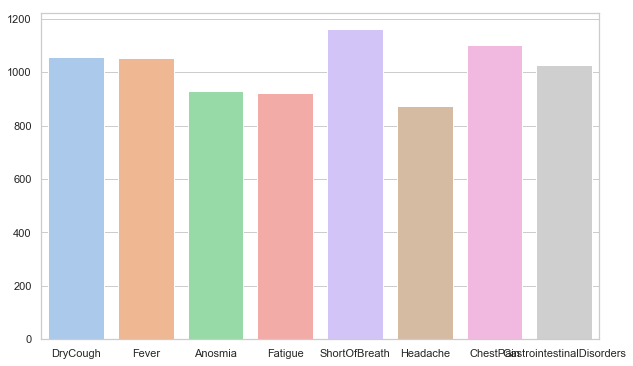

In [66]:
# Frequency of not infected cases don't have these symptoms
sns.barplot(Symt_name,Symt_notinfected_0)

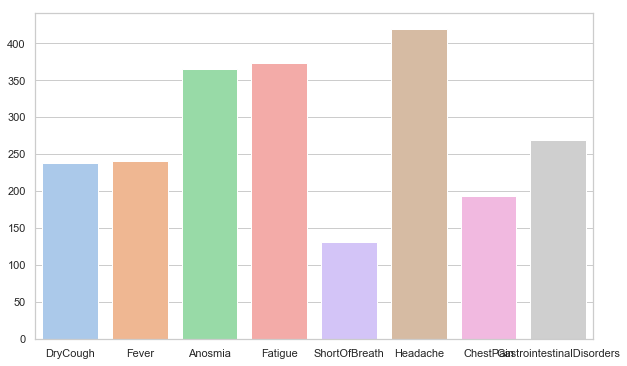

In [67]:
# Frequency of not infected cases have these symtoms
sns.barplot(Symt_name,Symt_notinfected_1)

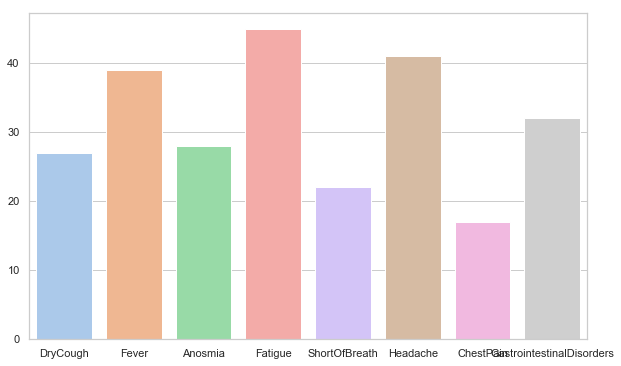

In [68]:
datasettemp3
act_data = datasettemp3[datasettemp3["Confirmed_State"]!=-1]
Symt_actinfected = []
Symt_act_name = []
for i in range(9,17):
    act_1 = act_data[act_data["Confirmed_State"] == 1].iloc[:,i]
    Symt_actinfected.append(act_1.value_counts()[1]) 
    Symt_act_name.append(act_1.name)
# Frequency of tested cases and confirmed 
sns.barplot(Symt_act_name,Symt_actinfected)

In [69]:
print("cases tested and confirmed have infected")
for k in range(0,8):
    print(Symt_act_name[k]," = ",np.round(Symt_actinfected[k]/len(act_1)*100,2), " %" )

cases tested and confirmed have infected
DryCough  =  47.37  %
Fever  =  68.42  %
Anosmia  =  49.12  %
Fatigue  =  78.95  %
ShortOfBreath  =  38.6  %
Headache  =  71.93  %
ChestPain  =  29.82  %
GastrointestinalDisorders  =  56.14  %


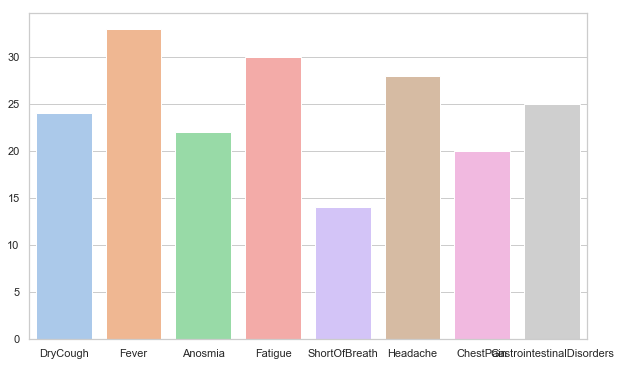

In [70]:
datasettemp3
act_data = datasettemp3[datasettemp3["Confirmed_State"]!=-1]
Symt_actinfected = []
Symt_act_name = []
for i in range(9,17):
    act_1 = act_data[act_data["Confirmed_State"] == 0].iloc[:,i]
    Symt_actinfected.append(act_1.value_counts()[1]) 
    Symt_act_name.append(act_1.name)
# Frequency of tested cases and confirmed 
sns.barplot(Symt_act_name,Symt_actinfected)

In [71]:
data2.columns

Index(['Age', 'location', 'Smok_state', 'Bloodpressure', 'Heart', 'Diabetes',
       'ChestDisease', 'In_contanct_with_confirmed_COVID', 'DryCough', 'Fever',
       'Anosmia', 'Fatigue', 'ShortOfBreath', 'Headache', 'ChestPain',
       'GastrointestinalDisorders', 'Symptoms_period',
       'Your_conatced_had_symptoms', 'Commitment_measures',
       'Close_family_deaths', 'pre_M', 'pre_K', 'pre_TM', 'pre_TK',
       'plot_columns0', 'plot_columns1'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


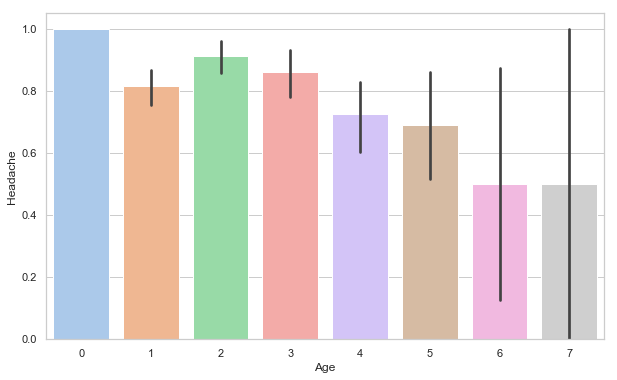

In [72]:
pre_data = data2[data2.pre_M == 1]

sns.barplot(x="Age",y="Headache",data=pre_data, hue=None)



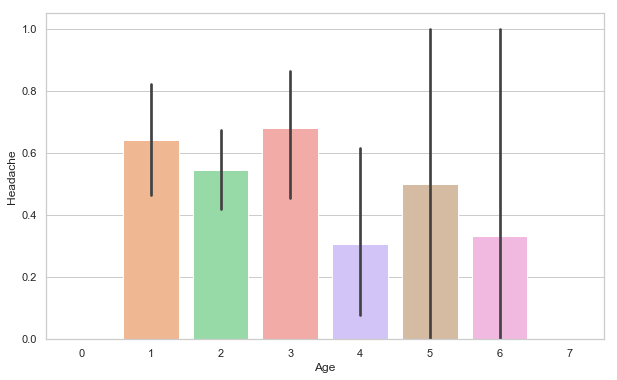

In [73]:
datasettemp3
act_data = datasettemp3[datasettemp3["Confirmed_State"]!=-1]
# Frequency of tested cases and confirmed 
sns.barplot(x="Age",y="Headache",data=act_data)
#['Age','DryCough', 'Fever','Anosmia', 'Fatigue', 'ShortOfBreath', 'Headache', 'ChestPain', 'GastrointestinalDisorders']


# Other method


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset3,Y,test_size=0.3,random_state=0)

In [75]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(dataset3,Y)
regr.score(dataset3,Y)

0.31541857497824466

In [76]:
dataset3.shape

(126, 19)

In [77]:
y_prd = regr.predict(dataset2)
print ("Total:act ", len(y_prd))
print ("Not infected:",len(y_prd)- np.count_nonzero(y_prd))
print ("Infected : ",np.count_nonzero(y_prd))

Total:act  1779
Not infected: 0
Infected :  1779


In [78]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print ("Total data ", len(y_p))
print ("Not infected:",len(y_p)- np.count_nonzero(y_p))
print ("Infected : ",np.count_nonzero(y_p))
print (np.count_nonzero(y_p)/len(y_p)*100," %")
print ("----------------------------------------------")
print ("Total data ", len(y_p1))
print ("Not infected:",len(y_p1)- np.count_nonzero(y_p1))
print ("Infected : ",np.count_nonzero(y_p1))
print (np.count_nonzero(y_p1)/len(y_p1)*100," %")
print ("----------------------------------------------------------")
print ("Total data :", len(y_p1)+len(y_p))
print ("not infected:", len(y_p1) + len(y_p) - np.count_nonzero(y_p1) - np.count_nonzero(y_p))
print ("Infected: ",np.count_nonzero(y_p1) + np.count_nonzero(pred_d2_M))
print ((np.count_nonzero(y_p1) + np.count_nonzero(y_p))/(len(y_p1)+len(y_p))*100,"%")

NameError: name 'y_score' is not defined

<h2 style='color:red'>Use One Hot Encoding For Location</h2>

In [ ]:
#dummies = pd.get_dummies(df.location)
#dummies.head()

In [79]:
from sklearn.metrics  import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV


In [80]:
from sklearn import svm
random_state = np.random.RandomState(10)
classifier = svm.LinearSVC(random_state=random_state)

#classifier.fit(X_train, y_train)
classifier.fit(dataset3, Y)
y_score = classifier.decision_function(dataset3)
y_p =classifier.predict(dataset2)
y_p1 =classifier.predict(dataset1)
classifier.score(dataset3, Y)

C:\Users\fakhr\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6428571428571429

In [81]:
classifier.score(dataset3, Y)
scores = cross_val_score(classifier, dataset3, Y, cv=5)
scores

C:\Users\fakhr\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fakhr\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fakhr\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fakhr\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fakhr\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: L

array([0.53846154, 0.48      , 0.64      , 0.6       , 0.52      ])

In [ ]:
#!pip install --upgrade --user C:\Users\fakhr\Downloads\scikit_learn-0.23.1-cp37-cp37m-win_amd64.whl
    


In [82]:

model2=SVC(kernel="linear",probability=True, C=10,break_ties=True).fit(dataset3,Y)  
model2.score(dataset3, Y)
scores = cross_val_score(model2, dataset3, Y, cv=5)
scores

array([0.57692308, 0.56      , 0.72      , 0.6       , 0.68      ])

In [83]:
predictions2=model2.predict(dataset3)
#p2=model.predict_proba(x_test)
#predictions2

In [84]:
#pickle.dump(model2, open('svcmodel.pkl','wb'))
kmodemodel = pickle.load(open('svcmodel.pkl','rb'))
case= [[ 1, 16, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 3, 0]]
print(int(kmodemodel.predict(case)))

1


In [ ]:
print(classification_report(Y,predictions2))

In [ ]:
y_p =model2.predict(dataset2)
y_p1 =model2.predict(dataset1)

In [ ]:
print ("Total data ", len(y_p))
print ("Not infected:",len(y_p)- np.count_nonzero(y_p))
print ("Infected : ",np.count_nonzero(y_p))
print (np.count_nonzero(y_p)/len(y_p)*100," %")
print ("----------------------------------------------")
print ("Total data ", len(y_p1))
print ("Not infected:",len(y_p1)- np.count_nonzero(y_p1))
print ("Infected : ",np.count_nonzero(y_p1))
print (np.count_nonzero(y_p1)/len(y_p1)*100," %")
print ("----------------------------------------------------------")
print ("Total data :", len(y_p1)+len(y_p))
print ("not infected:", len(y_p1) + len(y_p) - np.count_nonzero(y_p1) - np.count_nonzero(y_p))
print ("Infected: ",np.count_nonzero(y_p1) + np.count_nonzero(pred_d2_M))
print ((np.count_nonzero(y_p1) + np.count_nonzero(y_p))/(len(y_p1)+len(y_p))*100,"%")

In [ ]:
data2["SVC"] = y_p

In [ ]:
data2.head()

In [ ]:
print(data2[data2.pre_M==data2.SVC].shape[0]/data2.shape[0]*100,"%")

In [ ]:
print(data2[data2.pre_M!=data2.SVC].shape[0]/data2.shape[0]*100,"%")

In [ ]:
print(len(data2[data2.pre_M==data2.SVC]), " ",len(data2[data2.pre_M!=data2.SVC]))

In [ ]:

Symt_infected_1 = []

Symt_name = []

for i in range(8,16):
    
    pp_1 = data2[data2.SVC == 1].iloc[:,i]
  
    Symt_infected_1.append(pp_1.value_counts()[1])
    Symt_name.append(pp_1.name)
print("SVC -- Cases have symptoms and predicted as infected ")
for k in range(0,8):
    print(Symt_name[k]," = ",np.round(Symt_infected_1[k]/len(pp_1)*100,2), " %")    

In [ ]:
#!pip install xgboost

In [ ]:
from xgboost.sklearn import XGBClassifier
model8=XGBClassifier(max_depth=5,
                   subsample = 0.8,
                   n_estimators=300,
                   min_child_weight=1,
                   random_state=5,
                   learning_rate=0.05)
model8.fit(dataset3,Y)
predictions8=model8.predict(dataset3)
print(classification_report(Y,predictions8))
scores3 = cross_val_score(model8, dataset3, Y, cv=5)
scores3

In [ ]:
y_p =model8.predict(dataset2)
y_p1 =model8.predict(dataset1)


In [ ]:
print ("Total data ", len(y_p))
print ("Not infected:",len(y_p)- np.count_nonzero(y_p))
print ("Infected : ",np.count_nonzero(y_p))
print (np.count_nonzero(y_p)/len(y_p)*100," %")
print ("----------------------------------------------")
print ("Total data ", len(y_p1))
print ("Not infected:",len(y_p1)- np.count_nonzero(y_p1))
print ("Infected : ",np.count_nonzero(y_p1))
print (np.count_nonzero(y_p1)/len(y_p1)*100," %")
print ("----------------------------------------------------------")
print ("Total data :", len(y_p1)+len(y_p))
print ("not infected:", len(y_p1) + len(y_p) - np.count_nonzero(y_p1) - np.count_nonzero(y_p))
print ("Infected: ",np.count_nonzero(y_p1) + np.count_nonzero(pred_d2_M))
print ((np.count_nonzero(y_p1) + np.count_nonzero(y_p))/(len(y_p1)+len(y_p))*100,"%")

In [ ]:
data2["SVC"] = y_p